In [53]:
import librosa
import librosa.display
import math

In [54]:
import matplotlib.pyplot as plt
import numpy as np

In [55]:
import IPython.display

In [56]:
def detect(y,before,after):
    flag=True
    for i in before:
        if y>=i:
            flag=False
            break
    for i in after:
        if y>=i:
            flag=False
            break
    return flag

In [57]:
def flag_calc_peak2peak(y,num=10):
    peakflag=[]
    before=y[0:num]
    after=y[num+1:2*num+1]
#     print(before)
#     print(after)
    for i in range(num):
        peakflag.append(0)
    for i in range(num,len(y)-num-1):
#         print(y[i])
#         print(before)
#         print(after)
        if(detect(y[i],before,after)):
            peakflag.append(1)
        else:
            peakflag.append(0)
        before=np.delete(before,0)
        after=np.delete(after,0)
        before=np.append(before,y[i])
        after=np.append(after,y[i+num+1])

    for i in range(num+1):
        peakflag.append(0)
    return peakflag

In [58]:
def freq_calc(peakflag,sr):
    last=0
    freq=[]
    for i in range(len(peakflag)):
        if(peakflag[i]==1):
            if(last!=0):
                for j in range(last,i):
                    freq.append(sr/(i-last))
            last=i
        elif(last==0):
            freq.append(0)

    for i in range(last,len(peakflag)):
        freq.append(0)
    return freq

In [59]:
def zero_cross(y):
    peakflag=[]
    for i in range(len(y)):
        if(i==0):
            peakflag.append(0)
            continue
        if(i==len(y)-1):
            peakflag.append(0)
            break
        if((y[i-1]>0 and y[i]<0)):
            peakflag.append(1)
        else:
            peakflag.append(0)
    return peakflag

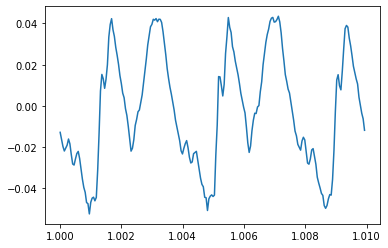

In [60]:
#use wavedata
y, sr=librosa.load("pe.wav")
timestamp=[]
for i in range(len(y)):
    timestamp.append(i/sr)
plt.plot(timestamp[1*sr:math.floor(1.01*sr)],y[1*sr:math.floor(1.01*sr)])

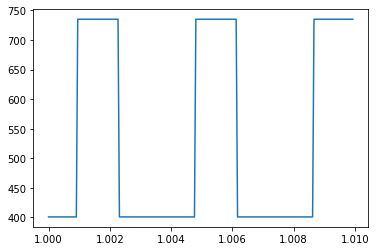

In [64]:
#peaktopeak
maxfreq=500
peakflag=flag_calc_peak2peak(y,num=10)
freq=freq_calc(peakflag,sr)
plt.plot(timestamp[1*sr:math.floor(1.01*sr)],freq[1*sr:math.floor(1.01*sr)])

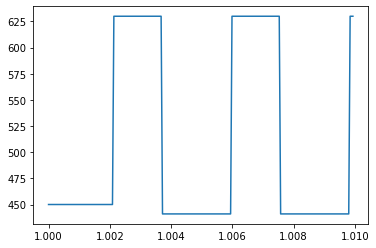

In [62]:
#zerocross
peakflag=zero_cross(y)
freq=freq_calc(peakflag,sr)
timestamp=[]
for i in range(len(y)):
    timestamp.append(i/sr)
plt.plot(timestamp[1*sr:math.floor(1.01*sr)],freq[1*sr:math.floor(1.01*sr)])

Text(0.5, 1.0, 'Estimated Fo')

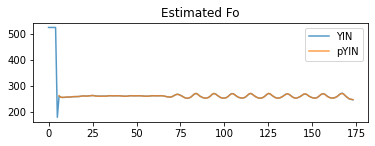

In [63]:
fmin, fmax = 180, 520
fo_yin = librosa.yin(y, fmin, fmax)
fo_pyin, voiced_flag, voiced_prob = librosa.pyin(y, fmin, fmax)
plt.subplot(2,1,1)
plt.plot(fo_yin,  label="YIN",  alpha=0.75)
plt.plot(fo_pyin, label="pYIN", alpha=0.75) 
plt.legend(loc='upper right')
plt.title("Estimated Fo")